In [330]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings('ignore')

# Data Import

In [331]:
train = pd.read_csv('Housing.csv')


def remove_outliers(df, column='price'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
train = remove_outliers(train)
X,y = train.drop('price',axis=1),train['price']

X.head()
X.shape[0]

530

# Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

class CategoricalVisualizer:
    def __init__(self, palette="Set2", figsize_unit=(6, 5)):
        self.palette = palette
        self.figsize_unit = figsize_unit

    def plot_counts(self, df, columns, title='Distribution of Categorical Variables'):
        n_cols = len(columns)
        n_rows = math.ceil(n_cols / 3)
        
        fig, axes = plt.subplots(
            n_rows, 3, 
            figsize=(self.figsize_unit[0] * 3, self.figsize_unit[1] * n_rows)
        )
        fig.suptitle(title, fontsize=16)
        axes = axes.flatten()

        for i, col in enumerate(columns):
            order = df[col].value_counts().index
            
            sns.countplot(
                data=df, x=col, ax=axes[i], 
                palette=self.palette, order=order
            )
            
            axes[i].set_title(f'{col.replace("_", " ").title()}')
            axes[i].set_xlabel('')
            axes[i].tick_params(axis='x', rotation=45)

        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
    
    def plot_boxplots(self, df, columns, target, title='Categorical Features vs Target'):
        n_cols = len(columns)
        n_rows = math.ceil(n_cols / 3) 
        
        fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 6))
        fig.suptitle(title, fontsize=16, fontweight='bold')
        axes = axes.flatten()

        for i, col in enumerate(columns):
            order = df.groupby(col)[target].median().sort_values().index
            
            sns.boxplot(
                data=df, x=col, y=target, ax=axes[i], 
                palette=self.palette, order=order,
                showmeans=True,
                meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"}
            )
            
            axes[i].set_title(f'{col.replace("_", " ").title()} vs {target.title()}')
            axes[i].set_xlabel('')
            axes[i].tick_params(axis='x', rotation=45)

        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()



class NumericalVisualizer:
    def __init__(self, palette="viridis", bins=30):
        self.palette = sns.color_palette(palette)
        self.bins = bins

    def plot_distributions(self, df, columns, title='Distribution of Numerical Variables'):
        n_cols = len(columns)
        n_rows = math.ceil(n_cols / 3) 
        fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 5))
        fig.suptitle(title, fontsize=18, fontweight='bold')
        axes = axes.flatten()

        for i, col in enumerate(columns):
            color = self.palette[i % len(self.palette)]
            
            sns.histplot(
                data=df, x=col, ax=axes[i], 
                kde=True, color=color, bins=self.bins
            )
            
            axes[i].set_title(f'Distribution: {col.replace("_", " ").title()}', fontsize=14)
            axes[i].set_xlabel('')
            axes[i].grid(axis='y', linestyle='--', alpha=0.7)

        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout(rect=[0, 0.03, 1, 0.97])
        plt.show()
    
    def plot_regressions(self, df, columns, target, n_samples=500, title='Numerical Features vs Target'):
        df_sample = df.sample(n=min(n_samples, len(df)), random_state=42)
        
        n_cols = len(columns)
        n_rows = math.ceil(n_cols / 3)
        
        fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 6))
        fig.suptitle(title, fontsize=16, fontweight='bold')
        axes = axes.flatten()

        for i, col in enumerate(columns):
            color = self.palette[i % len(self.palette)]
            
            sns.regplot(
                data=df_sample, x=col, y=target, ax=axes[i],
                scatter_kws={'alpha':0.5, 's':30}, 
                line_kws={'color': 'red', 'lw': 2}, 
                color=color
            )
            

            correlation = df[col].corr(df[target])
            axes[i].set_title(f'{col.title()} vs {target.title()} (Corr: {correlation:.2f})')
            axes[i].set_xlabel(col.replace("_", " ").title())
            axes[i].set_ylabel(target.title())


        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
    
    def plot_heatmap(self, df, columns, target, title='Correlation Heatmap'):
        cols_to_corr = columns + [target]
        corr_matrix = df[cols_to_corr].corr()

        plt.figure(figsize=(12, 10))
        

        sns.heatmap(            
            corr_matrix, 
            annot=True,           
            fmt=".2f",            
            cmap='coolwarm',      
            center=0,             
            linewidths=.5, 
            cbar_kws={"shrink": .8}
        )

        plt.title(title, fontsize=16, fontweight='bold', pad=20)
        plt.xticks(rotation=45, ha='right')
        plt.show()

In [333]:
features = list(X.columns)
num_cols = list(X.select_dtypes(exclude='object').columns)
cat_cols = list(X.select_dtypes(include='object').columns)

Let's train_test split

In [334]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [335]:
train = pd.concat([X_train,y_train],axis=1)
test = pd.concat([X_test,y_test],axis=1)

n_sample_train = train.shape[0]

In [336]:
train.isna().sum()

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64

1. Categorical Vizualization

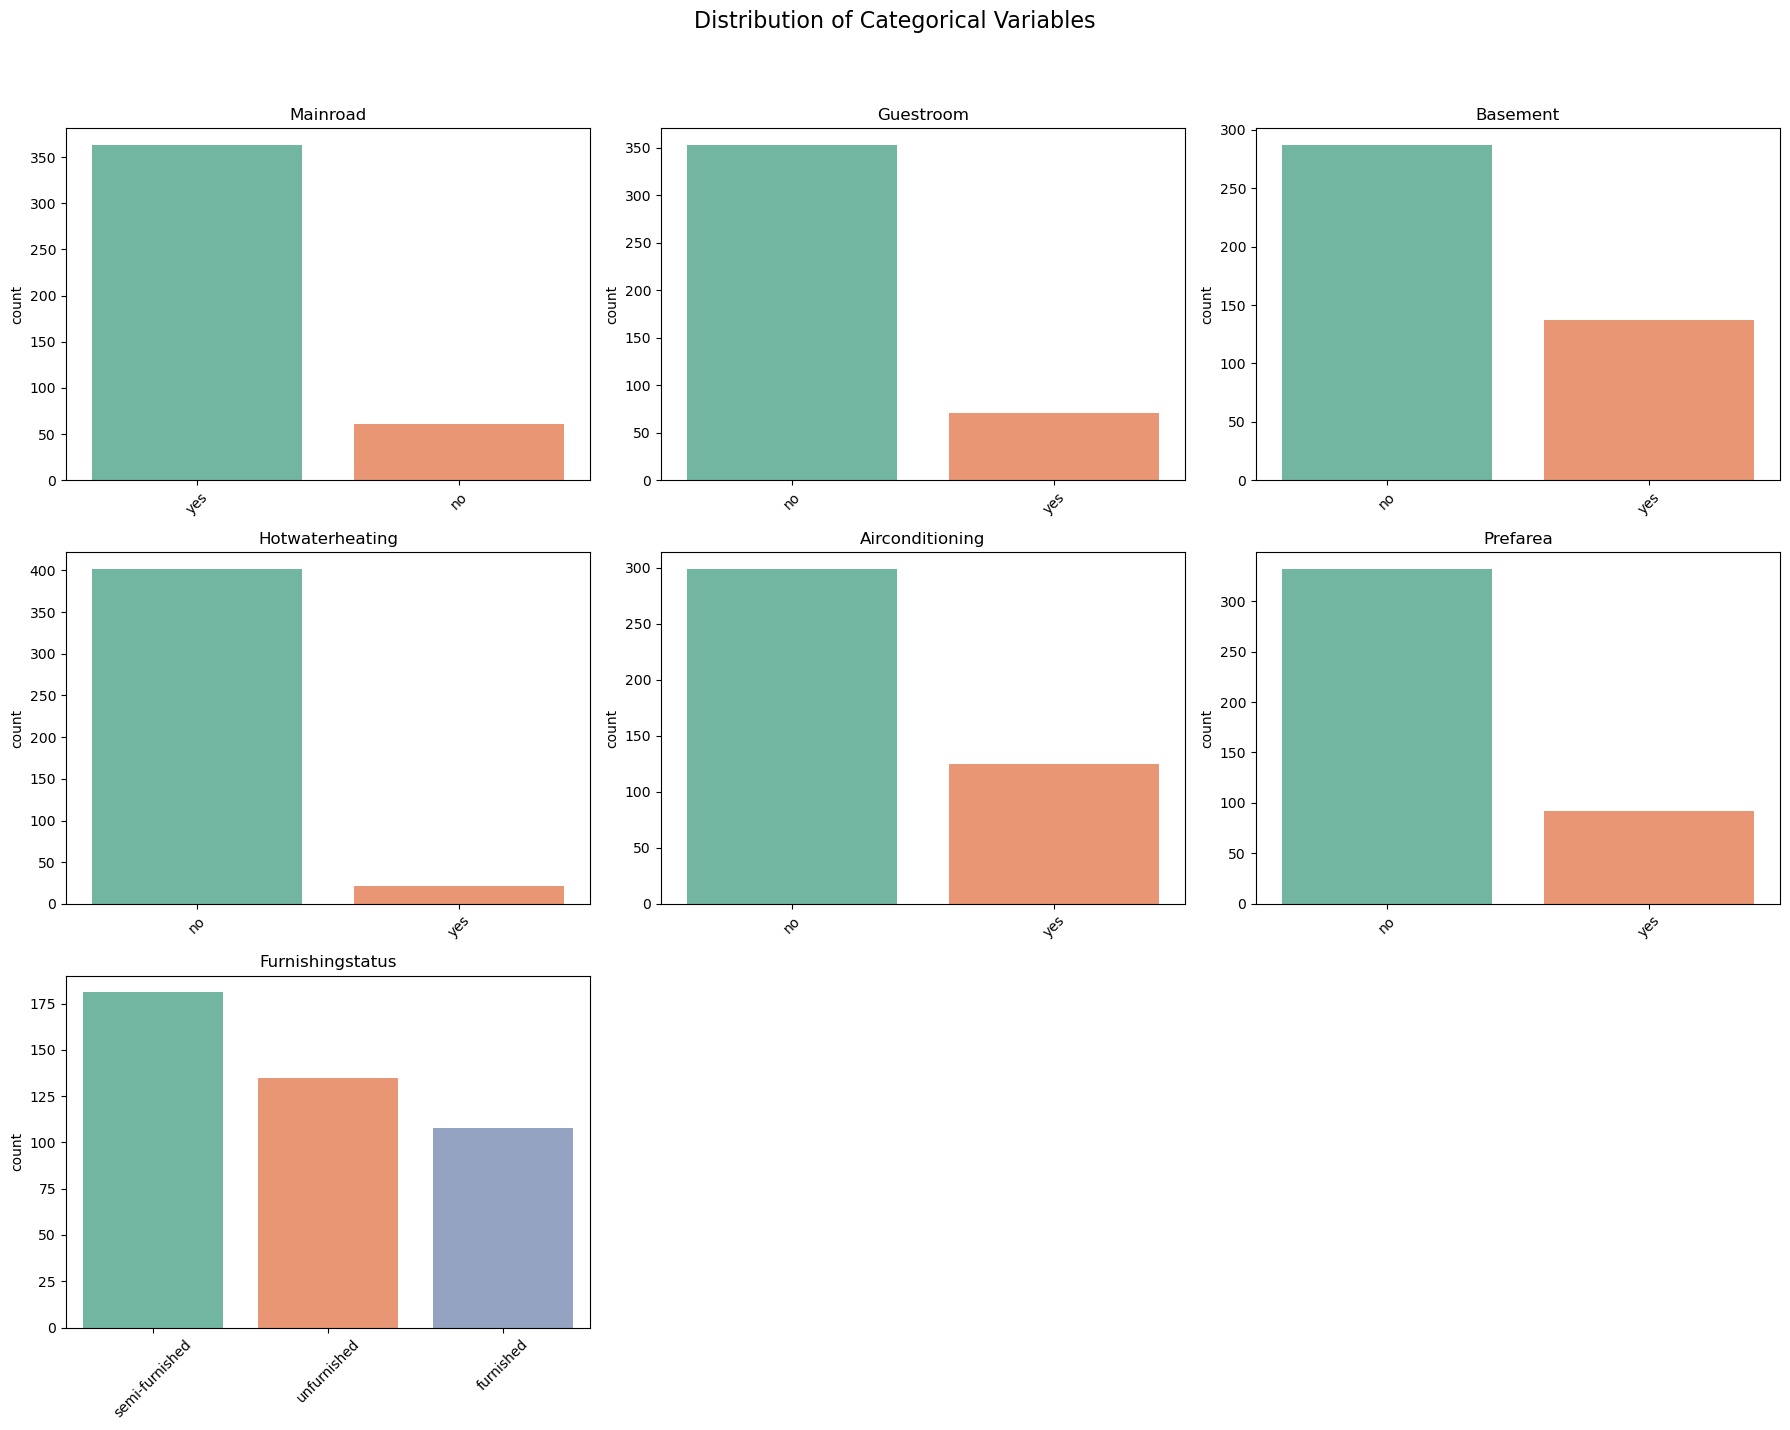

In [337]:
viz = CategoricalVisualizer()
viz.plot_counts(train, cat_cols)

Most features are unbalanced. We also see that Furnishingstatus can be Ordninal Encoded. 

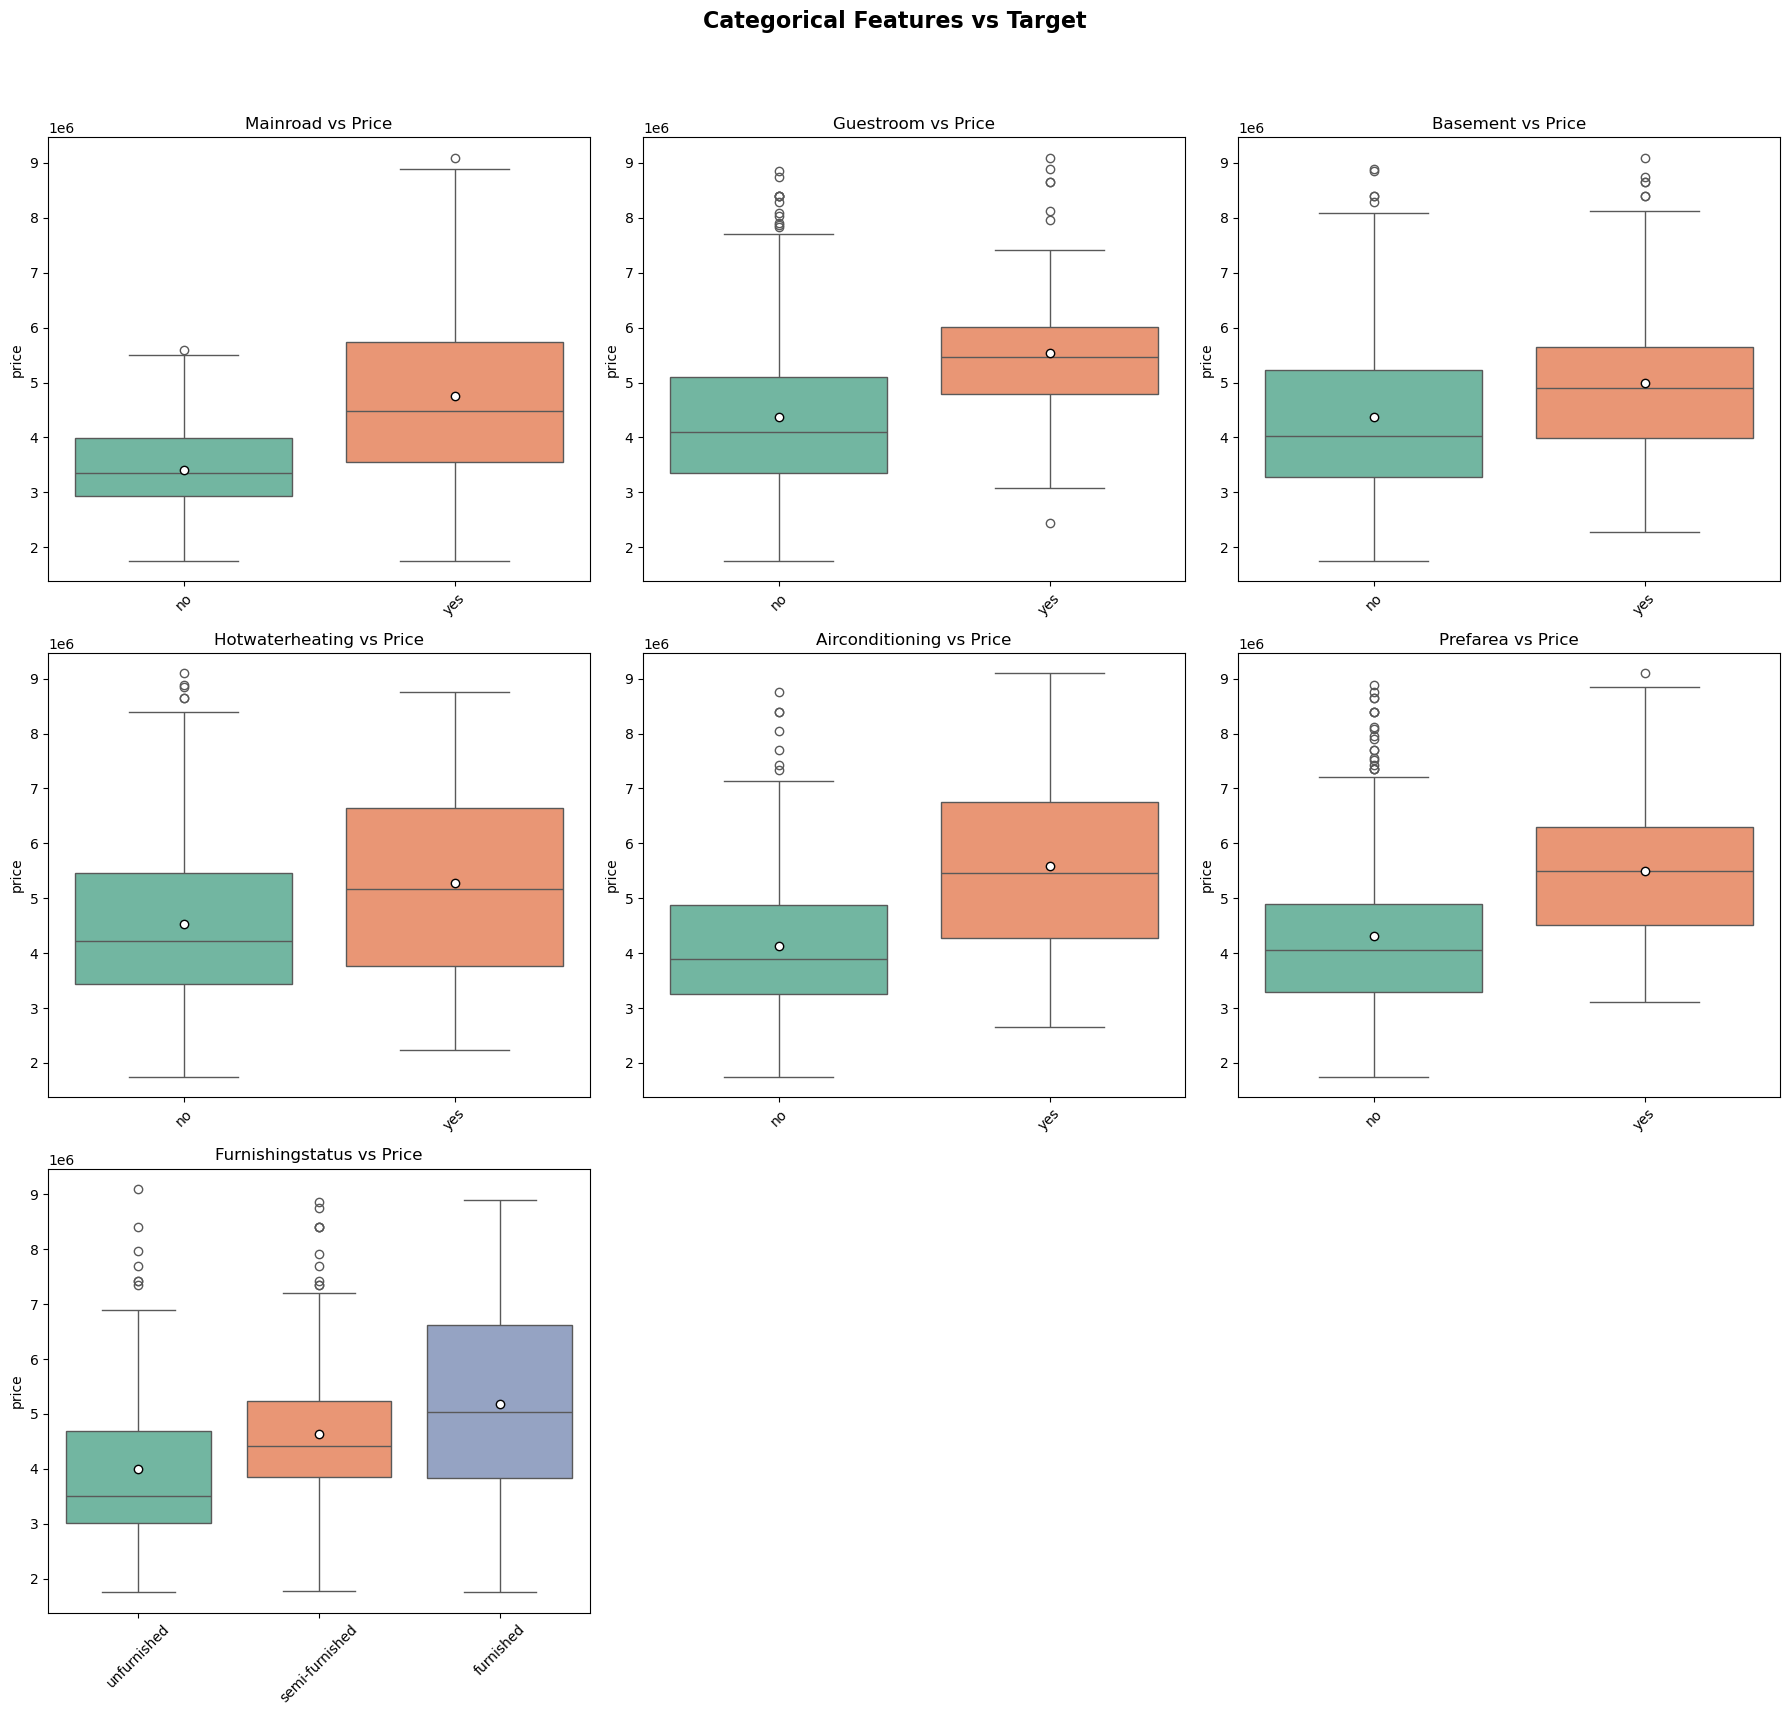

In [338]:
viz.plot_boxplots(train,cat_cols,'price')

2. Numerical Vizualization

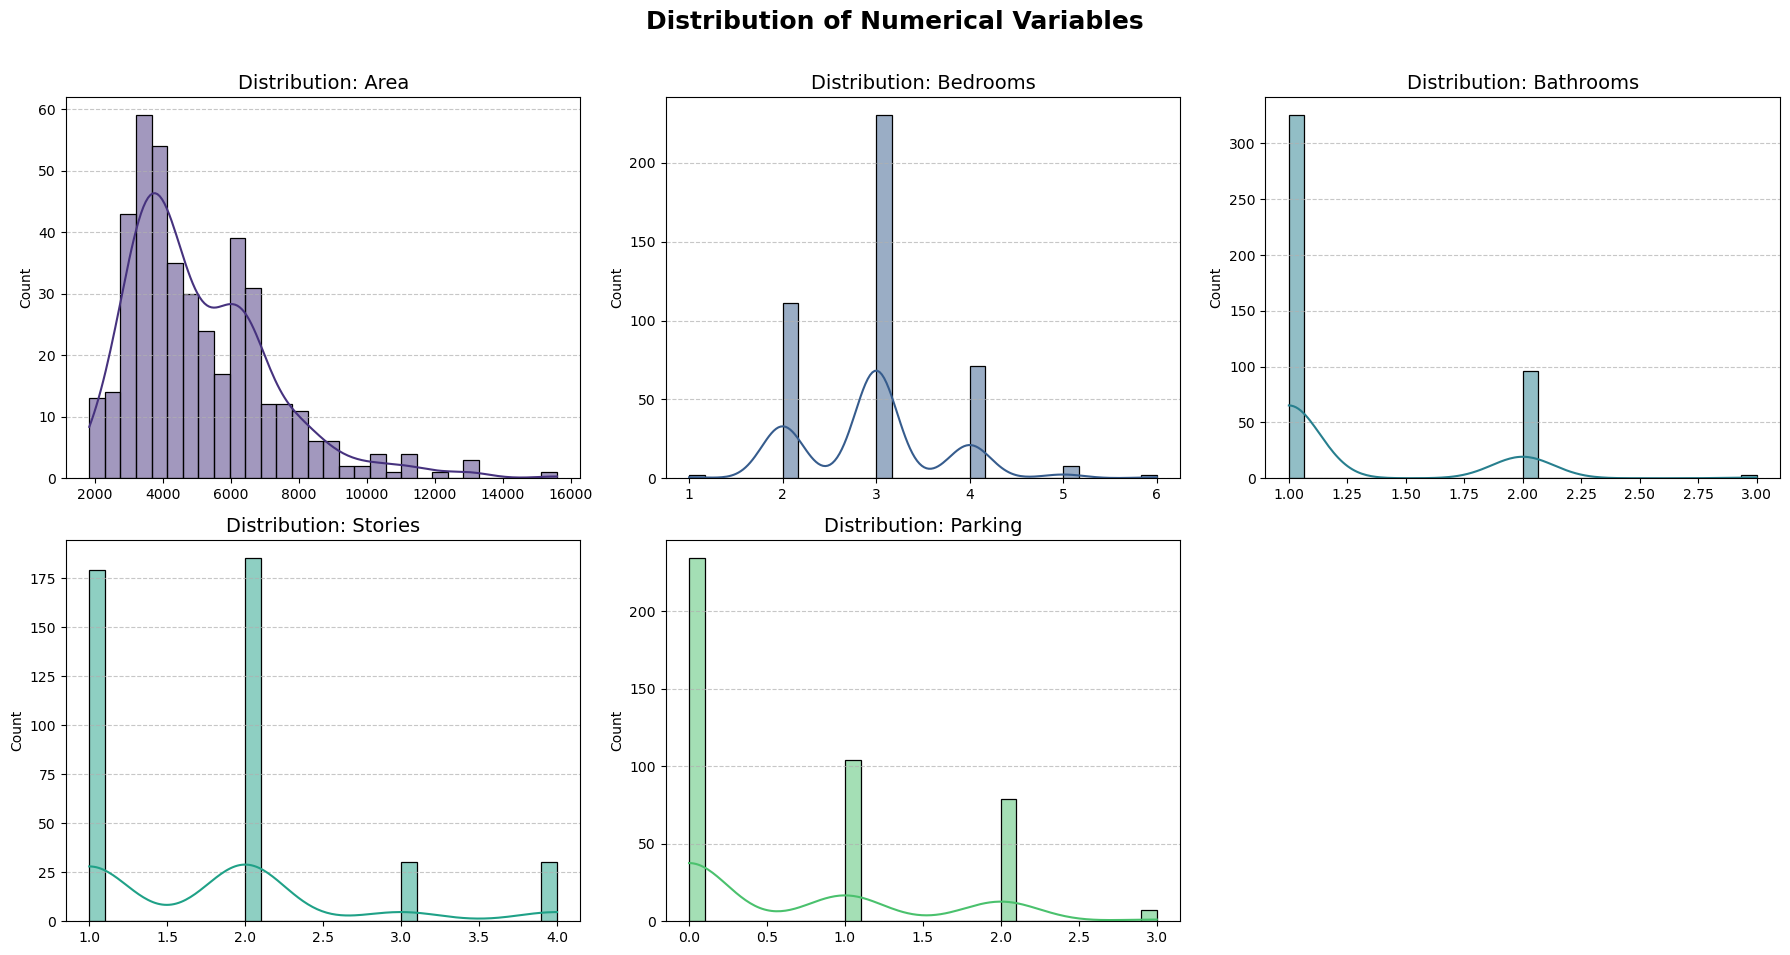

In [339]:
viz2 = NumericalVisualizer()

viz2.plot_distributions(train,num_cols)

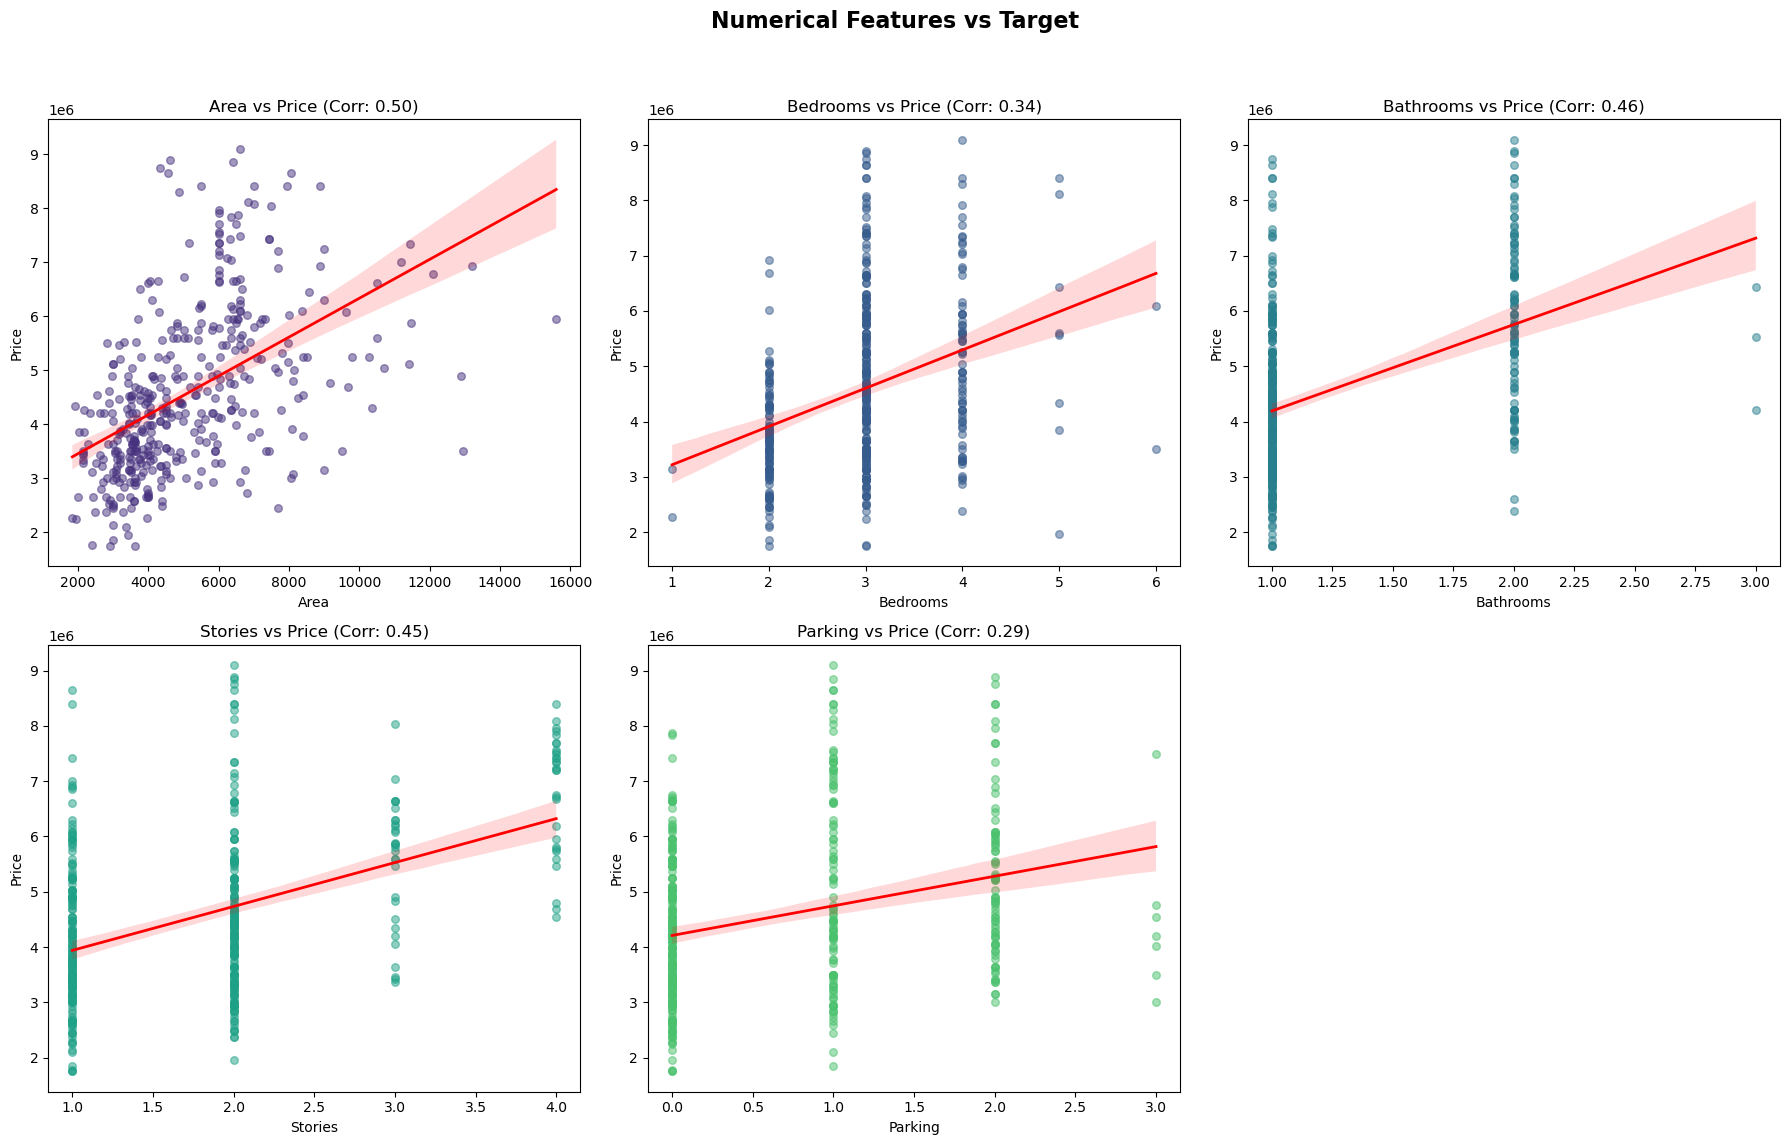

In [340]:
viz2.plot_regressions(train,num_cols,'price',n_samples=n_sample_train)

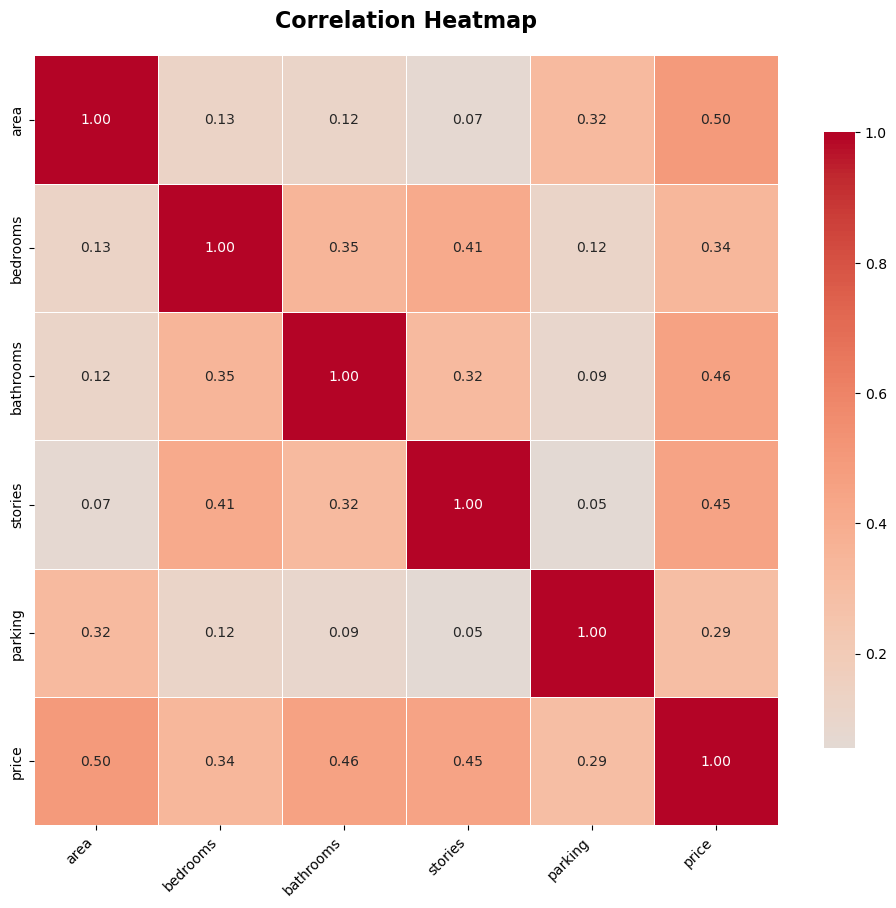

In [341]:
viz2.plot_heatmap(train,num_cols,'price')

Most predictive variable : area. Followed by bathrooms.

3. Area  & furnishing status vs Target : 

<Figure size 1000x600 with 0 Axes>

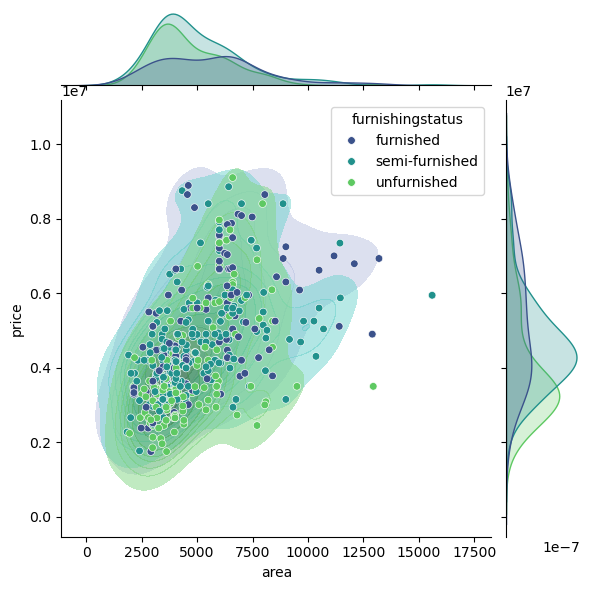

In [342]:

plt.figure(figsize=(10, 6))
g=sns.jointplot(data=train, x='area', y='price', hue='furnishingstatus', 
             palette='viridis', kind='kde', fill=True,alpha=0.5)
g.plot_joint(sns.scatterplot, alpha=1, s=30)

plt.title('Impact of area on price based on Furnishing Status')
plt.show()

When the appartment is unfurnished, the data is very concentrated ( most of the flat have a weak area & weak price). Although, when the appartment is furnished, the data is spreaded.

4. Mean of the price vs 2 classes variables.

In [343]:
list(train['mainroad'].unique())

['yes', 'no']

In [344]:
for col in cat_cols:
    cats = train[col].unique()
    for cat in cats:
        mean_price = train[train[col] == cat]['price'].mean()
        print(f"Feature: {col} | Category: {cat} | Mean price: {mean_price:.1f}")
    print('\n')

Feature: mainroad | Category: yes | Mean price: 4763248.7
Feature: mainroad | Category: no | Mean price: 3402223.8


Feature: guestroom | Category: yes | Mean price: 5537887.3
Feature: guestroom | Category: no | Mean price: 4372252.0


Feature: basement | Category: yes | Mean price: 4989365.0
Feature: basement | Category: no | Mean price: 4366034.6


Feature: hotwaterheating | Category: no | Mean price: 4528101.8
Feature: hotwaterheating | Category: yes | Mean price: 5286272.7


Feature: airconditioning | Category: yes | Mean price: 5594563.5
Feature: airconditioning | Category: no | Mean price: 4138041.8


Feature: prefarea | Category: yes | Mean price: 5500558.2
Feature: prefarea | Category: no | Mean price: 4308866.2


Feature: furnishingstatus | Category: furnished | Mean price: 5182166.1
Feature: furnishingstatus | Category: semi-furnished | Mean price: 4632279.0
Feature: furnishingstatus | Category: unfurnished | Mean price: 3988729.6




All of the features with 2 classes 'yes' category have a greater mean price. -> Ordinal Encoding : yes ->2, No ->1. Same for furnishing status.

5.  Bathrooms - Area  vs Target:

<Figure size 1000x600 with 0 Axes>

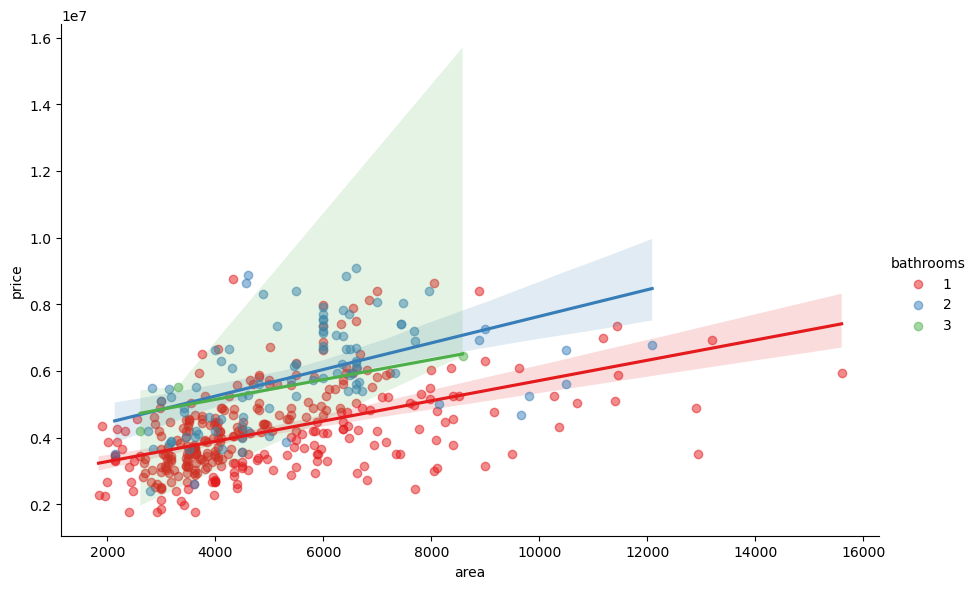

In [345]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='area', y='price', hue='bathrooms', data=train, 
           palette='Set1', height=6, aspect=1.5, scatter_kws={'alpha':0.5}, order=1)

5.  Bedrooms - Area  vs Target:

<Axes: xlabel='area', ylabel='price'>

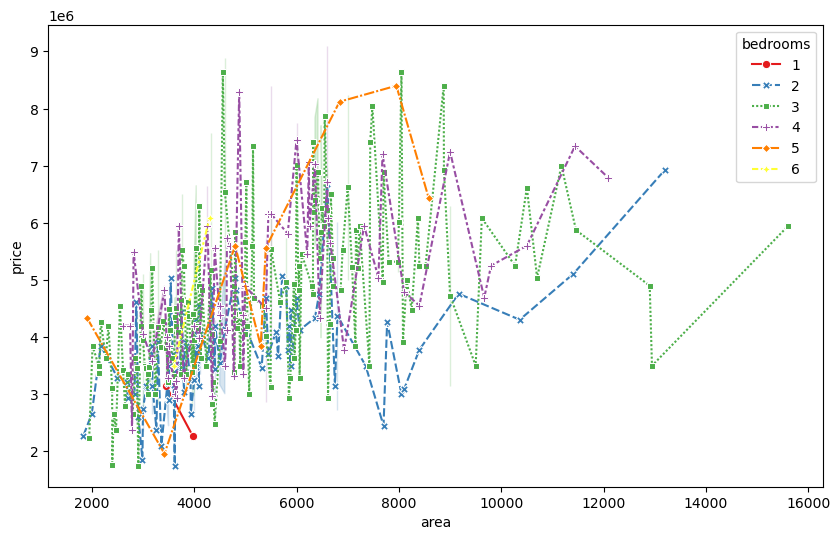

In [346]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='area', y='price', hue='bedrooms', data=train, palette='Set1',markers=True,style='bedrooms')

<Figure size 1000x600 with 0 Axes>

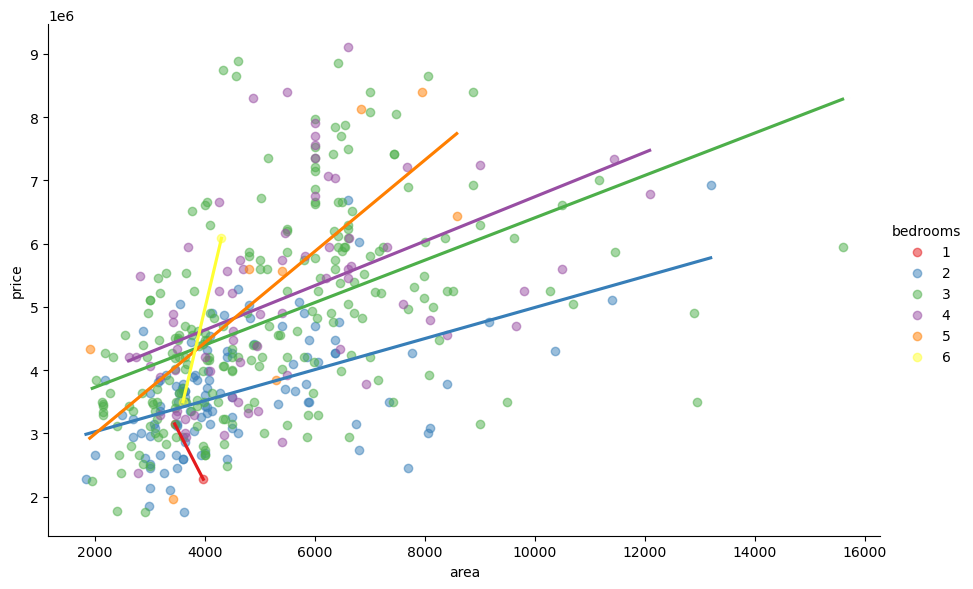

In [347]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='area', y='price', hue='bedrooms', data=train, 
           palette='Set1', height=6, aspect=1.5, scatter_kws={'alpha':0.5}, order=1,ci=None)

Trend : More the area increase, more the number of bedrooms increase, and more the price increase.

# Feature engineering pipeline :

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge



class OrdinalMapper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): return self
    def transform(self, X):
        X = X.copy()
        mappings = {
            'mainroad': {'yes': 1, 'no': 0},
            'guestroom': {'yes': 1, 'no': 0},
            'basement': {'yes': 1, 'no': 0},
            'hotwaterheating': {'yes': 1, 'no': 0},
            'airconditioning': {'yes': 1, 'no': 0},
            'prefarea': {'yes': 1, 'no': 0}
        }
        for col, mapping in mappings.items():
            if col in X.columns:
                X[f'{col}_score'] = X[col].map(mapping)
        return X


class InteractionCreator(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): return self
    def transform(self, X):
        X = X.copy()

        X['area_per_room'] = X['area'] / (X['bedrooms'] + X['bathrooms'])
        X['total_capacity'] = X['stories'] * X['parking']
        X['area_squared'] = X['area'] ** 2
        
        
        drop_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
        return X.drop(columns=[c for c in drop_cols if c in X.columns])

def get_preprocessor():
    nominal_cols = ['furnishingstatus']
    numeric_cols = ['mainroad_score','guestroom_score','basement_score','hotwaterheating_score','airconditioning_score',
                    'prefarea_score','area', 'bedrooms', 'bathrooms', 'stories', 'parking'
                    ,'area_per_room','total_capacity','area_squared']


    
    return Pipeline([
        ('ordinal', OrdinalMapper()),
        ('interactions', InteractionCreator()),
        ('prep', ColumnTransformer([
            ('num', StandardScaler(), numeric_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), nominal_cols)
        ]))
    ])

# Data Processing

In [ ]:
pipe = get_preprocessor()
X_train_process =pipe.fit_transform(X_train)
X_test_process = pipe.transform(X_test)

if isinstance(X_train_process, pd.DataFrame): 
    X_arr = X_train_process.values
    X_test_arr = X_test_process.values
else: 
    X_arr = X_train_process
    X_test_arr = X_test_process
y_arr = y_train.values

In [350]:
X_train_process

array([[ 0.4099318 ,  2.2297603 ,  1.44737366, ..., -0.66384298,
         0.        ,  0.        ],
       [-2.43943019, -0.4484787 , -0.69090659, ..., -0.66384298,
         1.        ,  0.        ],
       [ 0.4099318 ,  2.2297603 ,  1.44737366, ..., -0.66384298,
         0.        ,  0.        ],
       ...,
       [ 0.4099318 ,  2.2297603 , -0.69090659, ..., -0.66384298,
         1.        ,  0.        ],
       [ 0.4099318 , -0.4484787 ,  1.44737366, ..., -0.66384298,
         1.        ,  0.        ],
       [ 0.4099318 ,  2.2297603 , -0.69090659, ..., -0.66384298,
         0.        ,  0.        ]])

In [351]:
X_train_process.shape

(424, 15)

# 1. Model : Neural Network 

In [407]:
import torch
import torch.nn as nn
from sklearn.metrics import root_mean_squared_error,mean_squared_error,mean_absolute_error, mean_absolute_percentage_error


scaler_y = StandardScaler()

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)


scaler_y = StandardScaler()
y_train_scaled =torch.tensor(scaler_y.fit_transform(np.array(y_train_log).reshape(-1, 1))).float()
y_test_scaled = torch.tensor(scaler_y.transform(np.array(y_test_log).reshape(-1, 1))).float()

X_train_process_tensor = torch.from_numpy(X_train_process).float()
X_test_process_tensor = torch.from_numpy(X_test_process).float()



class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),nn.Dropout(0.2),
            nn.Linear(32, 16),
            nn.ReLU(),nn.Dropout(0.1),
            nn.Linear(16, 1)
            
        )

    def forward(self, x):
        return self.network(x)
    
model = MLP()

# Hyperparameters
learning_rate = 0.001
n_iters = 1000

# Loss

criterion= nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=1e-4)


#LOOP
for epoch in range(n_iters):
    # forward
    y_predd = model(X_train_process_tensor)

    #loss
    l=criterion(y_predd,y_train_scaled)

    #grad 
    l.backward()
    
    optimizer.step()

    optimizer.zero_grad()
    
    #steps
    if epoch %100 ==0 : 
        print(f'epoch {epoch +1}:, loss ={l.item():.4f} ')


with torch.no_grad():
    model.eval()
    y_pred_scaled = model(X_test_process_tensor).numpy()
    
    y_pred_log = scaler_y.inverse_transform(y_pred_scaled)
    
    y_pred_real = np.expm1(y_pred_log)
    y_test_real = np.array(y_test).reshape(-1, 1) 
    
    final_rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
    
    print(f"Erreur moyenne réelle : {final_rmse:,.2f}")
    print(f"Pourcentage error : {mean_absolute_percentage_error(y_test_real, y_pred_real) * 100:.2f}%")

epoch 1:, loss =0.9881 
epoch 101:, loss =0.3565 
epoch 201:, loss =0.3075 
epoch 301:, loss =0.3150 
epoch 401:, loss =0.2697 
epoch 501:, loss =0.2395 
epoch 601:, loss =0.2482 
epoch 701:, loss =0.2203 
epoch 801:, loss =0.2068 
epoch 901:, loss =0.2145 
Erreur moyenne réelle : 1,092,981.44
Pourcentage error : 19.43%


Let's check other models :

# 2. Model : Ridge regression.

In [403]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn.compose import TransformedTargetRegressor
import numpy as np

def get_full_pipeline():
    return Pipeline([
        ('preprocessor', get_preprocessor()),
        ('regressor', Ridge(alpha=1.0))
    ])

# Logaritmic transform :

model_log = TransformedTargetRegressor(
    regressor=get_full_pipeline(),
    func=np.log1p, 
    inverse_func=np.expm1
)

model_log.fit(X_train, y_train)

y_pred=model_log.predict(X_test)
print(f"Mean Absolute error : {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Pourcentage error : {mean_absolute_percentage_error(y_test, y_pred) * 100:.2f}%")

Mean Absolute error : 759642.13
Pourcentage error : 18.31%


# 3. Model XGBoost

In [ ]:
import xgboost as xgb
import optuna

def objective_xgb(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 500, 2000),
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.05, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 6),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 0.9),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 0.9),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-3, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-3, 10.0, log=True),
        "early_stopping_rounds": 50, 
        "objective": "reg:squarederror",
        "tree_method": "hist",
        "random_state": 42
    }

    y_train_log = np.log1p(y_train)
    y_test_log = np.log1p(y_test)

    model = xgb.XGBRegressor(**params)
    
    model.fit(
        X_train_process, y_train_log, 
        eval_set=[(X_test_process, y_test_log)],
        verbose=False
    )
    
    preds_log = model.predict(X_test_process)
    preds = np.expm1(preds_log)
    
    return mean_absolute_percentage_error(y_test, preds)

study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(objective_xgb, n_trials=30)

[I 2026-01-19 23:17:21,012] A new study created in memory with name: no-name-adedf36a-8e02-4aa2-882a-476cd09708a7
[I 2026-01-19 23:17:21,228] Trial 0 finished with value: 0.19364477694034576 and parameters: {'n_estimators': 1348, 'learning_rate': 0.00737216740083251, 'max_depth': 4, 'min_child_weight': 4, 'subsample': 0.8551077478725662, 'colsample_bytree': 0.7271345332958463, 'reg_alpha': 0.0025553413282069695, 'reg_lambda': 2.896842816645862}. Best is trial 0 with value: 0.19364477694034576.
[I 2026-01-19 23:17:21,313] Trial 1 finished with value: 0.19341766834259033 and parameters: {'n_estimators': 550, 'learning_rate': 0.019130588147747044, 'max_depth': 5, 'min_child_weight': 8, 'subsample': 0.6720034273530291, 'colsample_bytree': 0.6593085559583008, 'reg_alpha': 0.002284527652269631, 'reg_lambda': 0.5427435842831114}. Best is trial 1 with value: 0.19341766834259033.
[I 2026-01-19 23:17:21,441] Trial 2 finished with value: 0.18694807589054108 and parameters: {'n_estimators': 1404, 

0.18771059811115265 -> 18,77% MAPE. 